In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from params import *
import ghibtools as gh
import seaborn as sns
import xarray as xr
%matplotlib inline

In [3]:
def load_sp(patient):
    spindles = pd.read_excel(f'../df_analyse/spindles_{patient}.xlsx', index_col = 0)
    return spindles

In [4]:
def load_sw(patient):
    sw = pd.read_excel(f'../df_analyse/sw_{patient}.xlsx', index_col = 0)
    return sw

In [5]:
def load_all_sp(patients):
    concat = []
    for patient in patients:
        concat.append(load_sp(patient))
    return pd.concat(concat)

In [6]:
def load_all_sw(patients):
    concat = []
    for patient in patients:
        sw_of_patient = load_sw(patient)
        sw_of_patient.insert(0, 'patient', patient)
        concat.append(sw_of_patient)
    return pd.concat(concat)

In [7]:
sp = load_all_sp(patients)
sw = load_all_sw(patients)

In [8]:
sp

,patient,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,P1,59.058594,59.421875,59.949219,0.890625,50.531704,9.218439,1.675440,0.273461,13.133481,9,0.406114,Fp2-C4,0
1,P1,61.675781,62.152344,62.367188,0.691406,45.320142,11.024842,2.245295,0.551913,12.831497,9,0.685393,Fp2-C4,0
2,P1,65.429688,65.742188,66.015625,0.585938,44.190640,10.303671,2.206339,0.374822,13.945174,8,0.529801,Fp2-C4,0
3,P1,67.644531,67.765625,68.296875,0.652344,48.667588,11.655442,2.139003,0.361876,14.613991,8,0.184524,Fp2-C4,0
4,P1,87.617188,87.996094,88.328125,0.710938,50.774271,10.271449,1.864013,0.237496,13.915612,7,0.530055,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,P10,14133.433594,14133.718750,14134.515625,1.082031,27.364759,5.350725,1.300583,0.288894,13.829360,15,0.262590,T3-O1,7
3573,P10,14597.960938,14598.128906,14598.464844,0.503906,26.926206,6.306799,1.473247,0.253790,12.766432,6,0.330769,T3-O1,7
3574,P10,14614.031250,14614.339844,14614.675781,0.644531,34.620598,8.311678,1.893966,0.429763,13.607508,9,0.475904,T3-O1,7
3575,P10,14790.515625,14791.289062,14791.945312,1.429688,37.674629,7.106365,1.654388,0.300484,12.194456,16,0.539510,T3-O1,7


In [9]:
sw

,patient,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,SigmaPeak,PhaseAtSigmaPeak,ndPAC,Channel,IdxChannel
0,P1,217.242188,217.742188,218.039062,218.250000,218.574219,1.3320,-49.212601,26.474553,75.687154,254.946204,0.750751,217.457031,2.100138,0.390700,Fp2-C4,0
1,P1,441.878906,442.425781,442.761719,442.917969,443.093750,1.2148,-70.178987,17.865331,88.044319,262.085414,0.823181,441.914062,1.653936,0.300125,Fp2-C4,0
2,P1,447.082031,447.363281,447.621094,447.804688,447.976562,0.8945,-46.691497,30.282528,76.974025,298.565914,1.117943,447.144531,1.850405,0.304613,Fp2-C4,0
3,P1,447.976562,448.226562,448.460938,448.691406,448.968750,0.9922,-57.412672,48.587253,105.999925,452.266345,1.007861,447.226562,2.234253,0.000000,Fp2-C4,0
4,P1,528.066406,528.316406,528.562500,528.777344,528.988281,0.9219,-47.758588,40.480118,88.238707,358.557284,1.084716,528.046875,1.459173,0.288163,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,P10,14311.628906,14311.984375,14312.269531,14312.542969,14312.988281,1.3594,-77.188376,61.834063,139.022439,487.530746,0.735619,14311.964844,-3.059574,0.342557,T3-O1,7
5731,P10,14342.925781,14343.218750,14343.468750,14343.722656,14343.984375,1.0586,-43.521799,46.469639,89.991438,359.965751,0.944644,14343.656250,-0.432384,0.216792,T3-O1,7
5732,P10,14481.957031,14482.359375,14482.648438,14482.828125,14483.093750,1.1367,-56.386434,24.403113,80.789547,279.488161,0.879740,14483.046875,-0.262559,0.000000,T3-O1,7
5733,P10,14569.562500,14569.878906,14570.105469,14570.347656,14570.640625,1.0781,-51.707280,57.613689,109.320969,482.520140,0.927558,14569.679688,2.257499,0.097648,T3-O1,7


In [10]:
sw.describe()

,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,SigmaPeak,PhaseAtSigmaPeak,ndPAC,IdxChannel
count,34231.000000,34231.000000,34231.000000,34231.000000,34231.000000,34231.000000,34231.000000,34231.000000,34231.000000,34231.000000,34231.000000,34230.000000,34230.000000,34230.000000,34231.000000
mean,4847.940895,4848.274160,4848.576087,4848.839482,4849.167587,1.226692,-62.238652,47.551339,109.789991,395.108499,0.851636,4848.125698,0.134275,0.303202,3.420438
std,3565.320346,3565.327722,3565.329502,3565.329345,3565.339069,0.257749,17.185262,18.675676,26.588950,137.286044,0.177989,3565.264400,1.669022,0.135647,2.375716
min,12.789062,13.046875,13.273438,13.480469,13.746094,0.691400,-158.551680,10.054875,75.007701,82.830261,0.462086,13.386719,-3.141589,0.000000,0.000000
25%,1706.457031,1706.775391,1707.042969,1707.248047,1707.781250,1.015600,-71.134756,34.121459,88.775002,300.494110,0.705219,1706.009766,-1.149372,0.210036,1.000000
50%,4527.085938,4527.449219,4527.718750,4527.933594,4528.664062,1.199200,-58.219375,44.588503,103.907181,376.455355,0.833889,4527.769531,0.181405,0.305526,3.000000
75%,7031.990234,7032.306641,7032.578125,7032.775391,7033.031250,1.418000,-49.113500,58.343937,124.646791,477.348871,0.984640,7032.379883,1.493445,0.400732,5.000000
max,18505.972656,18506.683594,18506.910156,18507.128906,18507.425781,2.164100,-40.000034,143.167943,232.443363,1011.605176,1.446341,18506.410156,3.141360,0.793559,7.000000


In [11]:
da = xr.load_dataarray('../dataarray/da_N2N3_P1.nc')

In [12]:
sp_P1 = sp[(sp['patient'] == 'P1')]

In [13]:
sp_P1

,patient,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,P1,59.058594,59.421875,59.949219,0.890625,50.531704,9.218439,1.675440,0.273461,13.133481,9,0.406114,Fp2-C4,0
1,P1,61.675781,62.152344,62.367188,0.691406,45.320142,11.024842,2.245295,0.551913,12.831497,9,0.685393,Fp2-C4,0
2,P1,65.429688,65.742188,66.015625,0.585938,44.190640,10.303671,2.206339,0.374822,13.945174,8,0.529801,Fp2-C4,0
3,P1,67.644531,67.765625,68.296875,0.652344,48.667588,11.655442,2.139003,0.361876,14.613991,8,0.184524,Fp2-C4,0
4,P1,87.617188,87.996094,88.328125,0.710938,50.774271,10.271449,1.864013,0.237496,13.915612,7,0.530055,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,P1,9978.765625,9979.105469,9979.523438,0.757812,49.755146,12.269697,2.252278,0.449911,14.169072,9,0.446154,T3-O1,7
2631,P1,10133.925781,10134.144531,10134.460938,0.535156,64.324607,12.011265,2.019976,0.269088,13.732118,7,0.405797,T3-O1,7
2632,P1,10170.269531,10170.687500,10170.871094,0.601562,37.650290,8.835626,1.854639,0.254979,14.052185,6,0.690323,T3-O1,7
2633,P1,10262.921875,10263.269531,10263.558594,0.636719,48.351797,10.112342,1.877036,0.283520,14.457008,9,0.542683,T3-O1,7


In [14]:
sw_P1 = sw[(sw['patient'] == 'P1')]

In [15]:
sw_P1

,patient,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,SigmaPeak,PhaseAtSigmaPeak,ndPAC,Channel,IdxChannel
0,P1,217.242188,217.742188,218.039062,218.250000,218.574219,1.3320,-49.212601,26.474553,75.687154,254.946204,0.750751,217.457031,2.100138,0.390700,Fp2-C4,0
1,P1,441.878906,442.425781,442.761719,442.917969,443.093750,1.2148,-70.178987,17.865331,88.044319,262.085414,0.823181,441.914062,1.653936,0.300125,Fp2-C4,0
2,P1,447.082031,447.363281,447.621094,447.804688,447.976562,0.8945,-46.691497,30.282528,76.974025,298.565914,1.117943,447.144531,1.850405,0.304613,Fp2-C4,0
3,P1,447.976562,448.226562,448.460938,448.691406,448.968750,0.9922,-57.412672,48.587253,105.999925,452.266345,1.007861,447.226562,2.234253,0.000000,Fp2-C4,0
4,P1,528.066406,528.316406,528.562500,528.777344,528.988281,0.9219,-47.758588,40.480118,88.238707,358.557284,1.084716,528.046875,1.459173,0.288163,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,P1,10185.238281,10185.476562,10185.703125,10185.929688,10186.308594,1.0703,-79.020389,66.430586,145.450974,641.990507,0.934317,10184.742188,-2.175727,0.329953,T3-O1,7
2380,P1,10206.894531,10207.105469,10207.332031,10207.500000,10207.691406,0.7969,-58.042997,32.254004,90.297002,398.552283,1.254863,10207.105469,3.073854,0.169875,T3-O1,7
2381,P1,10417.582031,10417.843750,10418.132812,10418.371094,10418.625000,1.0430,-74.246186,50.281007,124.527193,430.796776,0.958773,10417.675781,2.042965,0.000000,T3-O1,7
2382,P1,10419.414062,10419.664062,10420.230469,10420.488281,10420.695312,1.2812,-51.974192,29.544716,81.518908,143.923038,0.780518,10420.640625,1.139343,0.160140,T3-O1,7


In [16]:
sw_P1[sw_P1['ndPAC'] == sw_P1['ndPAC'].max()]

,patient,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,SigmaPeak,PhaseAtSigmaPeak,ndPAC,Channel,IdxChannel
1573,P1,3710.949219,3711.214844,3711.914062,3712.101562,3712.285156,1.3359,-84.99372,16.639642,101.633362,145.352741,0.748559,3710.644531,0.22047,0.653513,Fp1-C3,5


In [17]:
%matplotlib widget

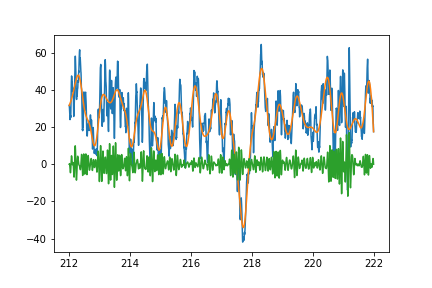

In [24]:
time = 217
hwin = 5
t, sig = da.loc['Fp2-C4',time - hwin:time + hwin].coords['time'].values, da.loc['Fp2-C4',time - hwin:time + hwin].values
filtered_sig = gh.filter_sig(sig, fs=256, low = None, high = 2)
sigma_sig = gh.filter_sig(sig, fs=256, low = 10, high = 16)
fig , ax = plt.subplots()
ax.plot(t, sig)
ax.plot(t, filtered_sig)
ax.plot(t, sigma_sig)
plt.show()

In [19]:
concat = []

for i, row in sw_P1.iterrows():
    start = row['Start'] 
    stop = row['End']
    spindles_in_sw = sp_P1[(sp_P1['Peak'] >= start) & (sp_P1['Peak'] < stop)]
    nspindles_in_sw = sum((sp_P1['Peak'] >= start) & (sp_P1['Peak'] < stop))
    if nspindles_in_sw != 0:
        concat.append([i , nspindles_in_sw])
df=pd.DataFrame(concat, columns = ['i', 'n sp in sw'])

In [20]:
df

,i,n sp in sw
0,353,1
1,356,1
2,395,3
3,402,1
4,403,1
...,...,...
56,2117,1
57,2220,1
58,2227,2
59,2256,1


In [21]:
df['n sp in sw'].unique()

array([1, 3, 2])

In [22]:
sw_P1.loc[395, : ]

patient                      P1
Start               2059.414062
NegPeak             2059.742188
MidCrossing         2059.996094
PosPeak             2060.230469
End                 2060.949219
Duration                 1.5352
ValNegPeak           -54.176207
ValPosPeak             43.60493
PTP                   97.781137
Slope                385.107248
Frequency              0.651381
SigmaPeak           2060.664062
PhaseAtSigmaPeak       0.905516
ndPAC                   0.50245
Channel                   C4-T4
IdxChannel                    1
Name: 395, dtype: object

In [23]:
sp_P1[(sp_P1['Peak'] > 2055) & (sp_P1['Peak'] < 2065)]

,patient,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
86,P1,2057.398438,2057.621094,2058.421875,1.023438,44.421357,10.484292,1.985433,0.530527,12.496558,14,0.216730,Fp2-C4,0
87,P1,2060.351562,2060.710938,2060.945312,0.593750,62.570055,13.629136,2.399635,0.286767,13.932729,8,0.601307,Fp2-C4,0
1070,P1,2057.414062,2058.000000,2058.398438,0.984375,46.367704,10.926148,2.185646,0.541257,12.567523,12,0.592885,Fz-Cz,3
1071,P1,2060.312500,2060.511719,2060.875000,0.562500,67.754698,15.016453,2.393197,0.293899,14.033167,7,0.351724,Fz-Cz,3
1725,P1,2060.292969,2060.371094,2060.812500,0.519531,61.999176,13.232713,2.156915,0.272618,14.203270,6,0.149254,Fp1-C3,5


In [44]:
sw.groupby('patient').mean()

,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,SigmaPeak,PhaseAtSigmaPeak,ndPAC,IdxChannel
patient,,,,,,,,,,,,,,,
P1,4557.301569,4557.643399,4557.946489,4558.199850,4558.520169,1.218600,-60.816841,46.738336,107.555177,389.667869,0.856111,4555.155837,0.109227,0.301048,3.548658
P10,5451.040097,5451.350926,5451.635229,5451.892183,5452.209560,1.169463,-63.087908,50.119364,113.207272,427.768458,0.890299,5451.360941,0.124464,0.293323,3.519093
P2,5043.840588,5044.165626,5044.458662,5044.709881,5045.025022,1.184434,-58.675146,44.191256,102.866402,382.872565,0.884708,5044.180531,0.064851,0.290767,3.408267
P3,4091.239986,4091.605285,4091.945965,4092.244792,4092.600287,1.360302,-59.329202,45.812101,105.141303,337.472742,0.764978,4091.608551,0.043432,0.303694,3.990476
P4,5982.772717,5983.143366,5983.462915,5983.739234,5984.132895,1.360178,-57.506376,38.128244,95.634620,321.827069,0.763697,5983.125343,0.195814,0.324376,2.936881
P5,4450.990400,4451.313163,4451.586808,4451.829197,4452.178622,1.188221,-52.547997,38.009173,90.557170,342.093178,0.867038,4451.326364,0.091740,0.309064,3.585691
P6,3966.976038,3967.321022,3967.647028,3967.920385,3968.241849,1.265811,-65.751701,49.953939,115.705639,393.189218,0.824142,3967.318621,0.184705,0.303568,3.526378
P7,4611.839422,4612.156119,4612.441617,4612.699170,4613.015105,1.175684,-61.669282,48.690340,110.359622,412.746820,0.883817,4612.181382,0.135595,0.314196,3.299586
P9,5875.728175,5876.075809,5876.375713,5876.637437,5876.990032,1.261857,-65.997411,47.605741,113.603151,405.406298,0.826907,5876.136275,0.221137,0.308686,2.957532


In [48]:
np.degrees(sw.mean()['PhaseAtSigmaPeak'])

/tmp/ipykernel_3646984/1841485101.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.degrees(sw.mean()['PhaseAtSigmaPeak'])


7.693412858357811